In [68]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import PublicFunctions as pf

# Read

The data was downloaded from Zillow Research (https://www.zillow.com/research/data/ --> Inventory --> New Listings (Raw, All Homes, Montly View)) as the .csv file given here. Column headers represent the last day of the month, which we simply refer to as the month, i.e., column '2018-1-31' is 'January 2018.'

In [69]:
df = pd.read_csv('Metro_new_listings_uc_sfrcondo_month.csv')
df

,RegionID,SizeRank,RegionName,RegionType,StateName,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,...,11/30/2021,12/31/2021,1/31/2022,2/28/2022,3/31/2022,4/30/2022,5/31/2022,6/30/2022,7/31/2022,8/31/2022
0,102001,0,United States,country,NaN,327792.0,381284.0,490780.0,529164.0,554878.0,...,315174.0,215175.0,253159.0,284434.0,385837.0,417512.0,440501.0,474768.0,409400.0,361392
1,394913,1,"New York, NY",msa,NY,14997.0,22401.0,23484.0,26845.0,26302.0,...,12043.0,6911.0,9214.0,11516.0,16027.0,16427.0,17057.0,17237.0,14057.0,11642
2,753899,2,"Los Angeles, CA",msa,CA,8274.0,9505.0,10523.0,11052.0,11871.0,...,6591.0,4466.0,6533.0,7619.0,9115.0,9312.0,9413.0,9847.0,8691.0,7464
3,394463,3,"Chicago, IL",msa,IL,8795.0,11937.0,17632.0,17154.0,17315.0,...,8726.0,5380.0,7253.0,8960.0,12644.0,13390.0,13876.0,14605.0,12056.0,10313
4,394514,4,"Dallas, TX",msa,TX,7848.0,8186.0,11131.0,12357.0,12362.0,...,7995.0,5751.0,6202.0,6155.0,8376.0,9647.0,10372.0,12367.0,10742.0,8544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,753929,923,"Zapata, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,6
885,394743,924,"Ketchikan, AK",msa,AK,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,12.0,15.0,7.0,9.0,13.0,7
886,753874,925,"Craig, CO",msa,CO,19.0,25.0,24.0,34.0,51.0,...,14.0,10.0,14.0,9.0,20.0,30.0,33.0,22.0,20.0,28
887,394767,926,"Lamesa, TX",msa,TX,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,13.0,6.0,8.0,11.0,10.0,18


# Isolate the data for the team

In [70]:
team = 24
row = df.iloc[team]
row

RegionID               395055
SizeRank                   24
RegionName    San Antonio, TX
RegionType                msa
StateName                  TX
                   ...       
4/30/2022              3204.0
5/31/2022              3472.0
6/30/2022              3908.0
7/31/2022              3573.0
8/31/2022                3147
Name: 24, Length: 61, dtype: object

Calculate the monthly averages for years 1 thru 4. 

In [71]:
# 2018
y1 = row[row.keys()[5:17]]
y1avg = y1.mean()
y1avg

2865.3333333333335

In [72]:
y2 = row[row.keys()[17:29]]
y2avg = y2.mean()
y2avg 

3000.4166666666665

In [73]:
y3 = row[row.keys()[29:41]]
y3avg = y3.mean()
y3avg 

2834.0

In [74]:
y4 = row[row.keys()[41:53]]
y4avg = y4.mean()
y4avg 

3118.75

# Forecast Using the Decomposition Method

Calculate the seasonal index for each season each year, and then the average (over the two years) for each season.

In [75]:
values = [(y1/y1avg).values,
         (y2/y2avg).values,
         (y3/y3avg).values,
         (y4/y4avg).values]
SI = pd.DataFrame(values, columns = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], index = ['Year 1', 'Year 2', 'Year 3', 'Year 4'])
SI.loc['Average'] = SI.mean()
SI

,January,February,March,April,May,June,July,August,September,October,November,December
Year 1,0.772685,0.913681,1.184853,1.235458,1.286063,1.254304,1.177175,1.101443,0.792578,0.892392,0.799209,0.590158
Year 2,0.860547,0.865213,1.140175,1.199833,1.266491,1.184502,1.189501,1.068518,0.888210,0.949868,0.787557,0.599583
Year 3,0.911080,1.025759,1.107975,0.921313,1.153140,1.149259,1.236768,1.104093,0.988003,1.005999,0.769584,0.627029
Year 4,0.861563,0.624289,0.954549,1.102685,1.150140,1.250180,1.388377,1.166172,1.021884,0.995912,0.833988,0.650261
Average,0.851469,0.857235,1.096888,1.114822,1.213959,1.209561,1.247955,1.110057,0.922669,0.961043,0.797584,0.616758


Deseasonalize the data.

In [76]:
y_dm = np.array(row[5:53])
y_dm[0] = y_dm[0]/SI.loc['Average']['January']
y_dm[1] = y_dm[1]/SI.loc['Average']['February']
y_dm[2] = y_dm[2]/SI.loc['Average']['March']
y_dm[3] = y_dm[3]/SI.loc['Average']['April']
y_dm[4] = y_dm[4]/SI.loc['Average']['May']
y_dm[5] = y_dm[5]/SI.loc['Average']['June']
y_dm[6] = y_dm[6]/SI.loc['Average']['July']
y_dm[7] = y_dm[7]/SI.loc['Average']['August']
y_dm[8] = y_dm[8]/SI.loc['Average']['September']
y_dm[9] = y_dm[9]/SI.loc['Average']['October']
y_dm[10] = y_dm[10]/SI.loc['Average']['November']
y_dm[11] = y_dm[11]/SI.loc['Average']['December']
y_dm[12] = y_dm[12]/SI.loc['Average']['January']
y_dm[13] = y_dm[13]/SI.loc['Average']['February']
y_dm[14] = y_dm[14]/SI.loc['Average']['March']
y_dm[15] = y_dm[15]/SI.loc['Average']['April']
y_dm[16] = y_dm[16]/SI.loc['Average']['May']
y_dm[17] = y_dm[17]/SI.loc['Average']['June']
y_dm[18] = y_dm[18]/SI.loc['Average']['July']
y_dm[19] = y_dm[19]/SI.loc['Average']['August']
y_dm[20] = y_dm[20]/SI.loc['Average']['September']
y_dm[21] = y_dm[21]/SI.loc['Average']['October']
y_dm[22] = y_dm[22]/SI.loc['Average']['November']
y_dm[23] = y_dm[23]/SI.loc['Average']['December']
y_dm[24] = y_dm[24]/SI.loc['Average']['January']
y_dm[25] = y_dm[25]/SI.loc['Average']['February']
y_dm[26] = y_dm[26]/SI.loc['Average']['March']
y_dm[27] = y_dm[27]/SI.loc['Average']['April']
y_dm[28] = y_dm[28]/SI.loc['Average']['May']
y_dm[29] = y_dm[29]/SI.loc['Average']['June']
y_dm[30] = y_dm[30]/SI.loc['Average']['July']
y_dm[31] = y_dm[31]/SI.loc['Average']['August']
y_dm[32] = y_dm[32]/SI.loc['Average']['September']
y_dm[33] = y_dm[33]/SI.loc['Average']['October']
y_dm[34] = y_dm[34]/SI.loc['Average']['November']
y_dm[35] = y_dm[35]/SI.loc['Average']['December']
y_dm[36] = y_dm[36]/SI.loc['Average']['January']
y_dm[37] = y_dm[37]/SI.loc['Average']['February']
y_dm[38] = y_dm[38]/SI.loc['Average']['March']
y_dm[39] = y_dm[39]/SI.loc['Average']['April']
y_dm[40] = y_dm[40]/SI.loc['Average']['May']
y_dm[41] = y_dm[41]/SI.loc['Average']['June']
y_dm[42] = y_dm[42]/SI.loc['Average']['July']
y_dm[43] = y_dm[43]/SI.loc['Average']['August']
y_dm[44] = y_dm[44]/SI.loc['Average']['September']
y_dm[45] = y_dm[45]/SI.loc['Average']['October']
y_dm[46] = y_dm[46]/SI.loc['Average']['November']
y_dm[47] = y_dm[47]/SI.loc['Average']['December']
print("y = ",y_dm)

y =  [2600.2128764973745 3054.003986816006 3095.119949961233 3175.3935971143023
 3035.523386327108 2971.3248312181745 2702.8210252128188 2843.098339995417
 2461.338703536447 2660.6521594557125 2871.1692970142567
 2741.7571308341526 3032.4072480199734 3028.3400877671324
 3118.8233722584323 3229.2138275738666 3130.254781015742 2938.254994476737
 2859.8779243950635 2888.141089361631 2888.3609180645667
 2965.5293916498945 2962.695654517331 2916.866397617174 3032.4072480199734
 3391.1342970489422 2862.6440774310076 2342.077028832046 2692.019111673538
 2692.7114566715622 2808.5940389478 2818.7752553376617 3034.6756362404453
 2966.5699282785436 2734.506653619255 2881.1959914206323
 3155.7235768511496 2271.255065825349 2714.0418530293346
 3084.7962091740355 2954.795763027228 3223.482336371637 3469.675374791433
 3276.4095888983943 3454.111161677964 3231.9067685840605
 3261.0966556917388 3288.162898481172]


Perform simple linear regression to extract trend.

In [77]:
model_dm = LinearRegression()
x = np.arange(1, 49).reshape((-1, 1))
model_dm.fit(x,y_dm)
r_sq_dm = model_dm.score(x, y_dm)
print('Coefficient of determination:', r_sq_dm)
intercept_dm = model_dm.intercept_
print('Intercept:', intercept_dm)
slope_dm = model_dm.coef_[0]
print('Slope:', slope_dm)

Coefficient of determination: 0.07637214616587173
Intercept: 2828.148584795483
Slope: 5.155456527586976


Extend the trend to year 5. 

In [78]:
#The forecast calculation is explicitly stated here but you can use sklearn's Predict function, as well (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).
forecast_dm = []
for t in range(49,61):
    forecast_dm.append(intercept_dm + t*slope_dm)
forecast_dm

[3080.765954647245,
 3085.921411174832,
 3091.076867702419,
 3096.232324230006,
 3101.3877807575927,
 3106.54323728518,
 3111.698693812767,
 3116.854150340354,
 3122.009606867941,
 3127.165063395528,
 3132.3205199231147,
 3137.4759764507016]

Seasonalize year 5 forecasts.

In [79]:
forecast_dm[0] = forecast_dm[0]*SI.loc['Average']['January']
forecast_dm[1] = forecast_dm[1]*SI.loc['Average']['February']
forecast_dm[2] = forecast_dm[2]*SI.loc['Average']['March']
forecast_dm[3] = forecast_dm[3]*SI.loc['Average']['April']
forecast_dm[4] = forecast_dm[4]*SI.loc['Average']['May']
forecast_dm[5] = forecast_dm[5]*SI.loc['Average']['June']
forecast_dm[6] = forecast_dm[6]*SI.loc['Average']['July']
forecast_dm[7] = forecast_dm[7]*SI.loc['Average']['August']
forecast_dm[8] = forecast_dm[8]*SI.loc['Average']['September']
forecast_dm[9] = forecast_dm[9]*SI.loc['Average']['October']
forecast_dm[10] = forecast_dm[10]*SI.loc['Average']['November']
forecast_dm[11] = forecast_dm[11]*SI.loc['Average']['December']
forecast_dm

[2623.175927340612,
 2645.360742596319,
 3390.56519149804,
 3451.7492375543384,
 3764.956654120859,
 3757.554972616568,
 3883.2610803018424,
 3459.884436670598,
 2880.5803146921935,
 3005.3387620342423,
 2498.290155889862,
 1935.0626707639851]

# Forecast Using Multiple Linear Regression

Populate independent variables

In [80]:
x = np.arange(1, 49).reshape((-1, 1))#Must change this to add the dummy binary variables.
x2 = [np.append(v, np.zeros(11, dtype=np.int8)) for v in x]
for i, x in enumerate(x2):
    if(i%12 == 0): 
        continue
    x[(i%12)] = 1


Run multiple linear regression.

In [81]:
model_mlr = LinearRegression()
model_mlr.fit(x2,np.array(row[5:53])) 

LinearRegression()

Calculate the forecasts.

In [82]:
ex = np.arange(49, 61).reshape((-1, 1))#Must change this to add the dummy binary variables.
newx = [np.append(v, np.zeros(11, dtype=np.int8)) for v in ex]
for i, x in enumerate(newx):
    if(i%12 == 0): 
        continue
    x[(i%12)] = 1

forecast_mlr = model_mlr.predict(newx)
r_sq_mlr = model_mlr.score(x2,np.array(row[5:53]))
print('Coefficient of determination:', r_sq_mlr)
intercept_mlr = model_mlr.intercept_
print('Intercept:', intercept_mlr)
print('Coefs:', model_mlr.coef_)
print('Forecast: ',forecast_mlr)

Coefficient of determination: 0.8330704327113829
Intercept: 2422.2263888888942
Coefs: [   4.94861111   -4.19861111  707.10277778  766.40416667 1048.95555556
 1035.00694444 1148.30833333  731.10972222  174.91111111  280.2125
 -206.98611111 -746.93472222]
Forecast:  [2664.70833333 2665.45833333 3381.70833333 3445.95833333 3733.45833333
 3724.45833333 3842.70833333 3430.45833333 2879.20833333 2989.45833333
 2507.20833333 1972.20833333]


# Calculate Forecast Accuracy

In [83]:
actual_Year5 = []
for t in range(53,61):
    actual_Year5.append(row[t])
actual_Year5

[2096.0, 2201.0, 2952.0, 3204.0, 3472.0, 3908.0, 3573.0, 3147]

In [84]:
deviation_dm = []
deviation_mlr = []
for t in range(8):
    deviation_dm.append(forecast_dm[t] - actual_Year5[t]) 
    deviation_mlr.append(forecast_mlr[t] - actual_Year5[t]) 
MAD_dm = pf.CalculateMeanAbsoluteDeviation(deviation_dm)
MAD_mlr = pf.CalculateMeanAbsoluteDeviation(deviation_mlr)
print("MAD_DM:",MAD_dm)
print("MAD_MLR:",MAD_mlr)

MAD_DM: 340.5497871832551
MAD_MLR: 337.87500000000034


### Backtesting MLR Against Historical Data for Comparison

Text(0.5, 1.0, 'Backforecasting of MLR Model with Historical Data vs. Actual Data, January 2018 - August 2022')

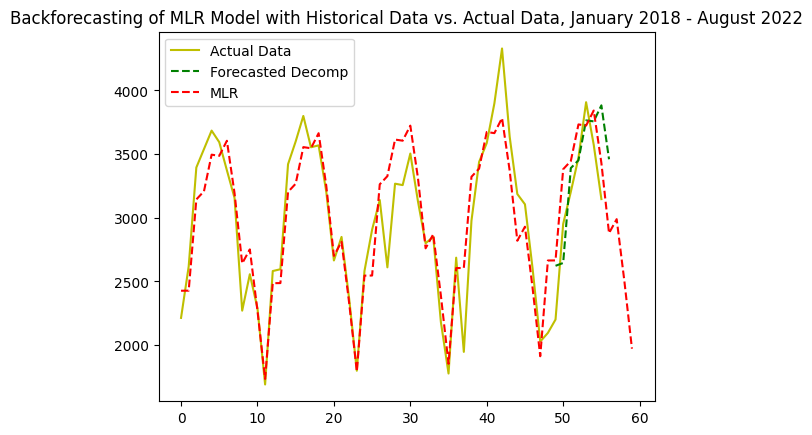

In [85]:
plot = plt.figure()
plt.subplot().plot(range(56), row[5:65], 'y-', label="Actual Data")
plt.subplot().plot(range(49,57), forecast_dm[:8], 'g--', label="Forecasted Decomp")
plt.subplot().plot(range(60), model_mlr.predict(np.concatenate((x2, newx))), 'r--', label='MLR')
plt.legend()
plt.title("Backforecasting of MLR Model with Historical Data vs. Actual Data, January 2018 - August 2022")

Text(0.5, 1.0, 'Year 5 (2022) Forecasts vs. Actual, January-August')

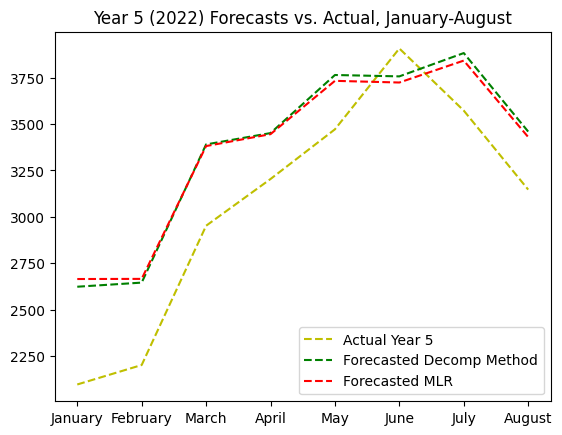

In [86]:
plot = plt.figure()
plt.subplot().plot(range(8), actual_Year5, 'y--', label="Actual Year 5")
plt.subplot().plot(range(8), forecast_dm[:8], 'g--', label ="Forecasted Decomp Method")
plt.subplot().plot(range(8), forecast_mlr[:8], 'r--', label="Forecasted MLR")
plt.legend()
plt.xticks(range(8),['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August'])
plt.title("Year 5 (2022) Forecasts vs. Actual, January-August")

# Bonus Part

Adding unemployment rate for each month as another factor in multiple linear regression


In [87]:
df = pd.read_csv('metro_san_antonio.csv')
df.columns = df.iloc[9]
df.drop(df.index[:10], axis=0, inplace=True)
vals = df[72:128]
unemployment = pd.to_numeric(vals['unemployment']).values  


## Add new data to x values

We scaled the independent variables with a scalar to normalize the effect of each variable (if we didn't do this unemployment rate would be weighted too much and the prediction was too off)

In [88]:
from sklearn.preprocessing import StandardScaler
x = np.arange(1, 49).reshape((-1, 1))
x2 = [np.append(v, np.zeros(11, dtype=np.int8))for v in x]
x2 = [np.append(v, unemployment[i])for i, v in enumerate(x2)]

for i, x in enumerate(x2):
    if(i%12 == 0): 
        continue
    x[(i%12)] = 1

sc_x = StandardScaler()
x2 = sc_x.fit_transform(x2)

In [89]:
model_unem = LinearRegression()
model_unem.fit(x2,np.array(row[5:53])) 

LinearRegression()

In [90]:
#months 49-56 prediction

ex = np.arange(49, 49+8).reshape((-1,1))
newx = [np.append(v, np.zeros(11, dtype=np.int8)) for v in ex] 
newx = [np.append(v, unemployment[i])for i, v in enumerate(newx,48)]
for i, x in enumerate(newx): 
    if(i%12 == 0): 
        continue 
    x[(i%12)] = 1 
newx = sc_x.fit_transform(newx)
forecast_unem = model_unem.predict(newx)

forecast_unem

array([1773.06157538, 1841.52511138, 2964.56575066, 3323.97463739,
       3543.00494589, 3340.90370805, 3557.63083646, 3292.3334348 ])

## Plot all 4 Datasets to Compare

<module 'matplotlib.pyplot' from '/Users/sliang/Library/Python/3.9/lib/python/site-packages/matplotlib/pyplot.py'>

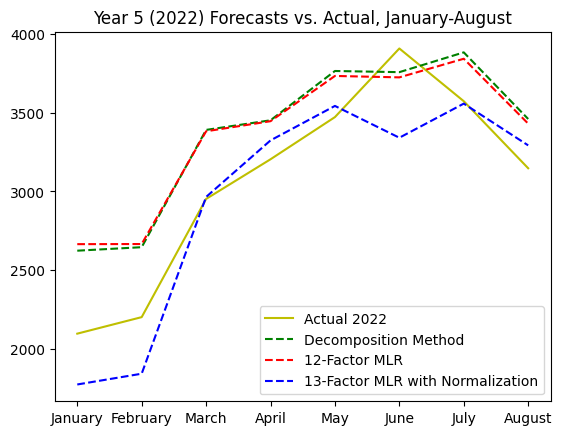

In [91]:
plot = plt.figure()
plt.subplot().plot(range(8), actual_Year5, 'y-', label= "Actual 2022")
plt.subplot().plot(range(8), forecast_dm[:8], 'g--', label="Decomposition Method")
plt.subplot().plot(range(8), forecast_mlr[:8], 'r--', label="12-Factor MLR")
plt.subplot().plot(range(8), forecast_unem[:8], 'b--', label="13-Factor MLR with Normalization")
plt.xticks(range(8),['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August'])
plt.title("Year 5 (2022) Forecasts vs. Actual, January-August")
plt.legend()
plt

### Calculate MAD for each Forecast

In [92]:
deviation_mlr_unem = [f - actual_Year5[t] for t,f in enumerate(forecast_unem)]


MAD_unem = pf.CalculateMeanAbsoluteDeviation(deviation_mlr_unem)
print("MAD_DM:",MAD_dm)
print("MAD_MLR:",MAD_mlr)
print("MAD_MLR with Unemployment:",MAD_unem)

MAD_DM: 340.5497871832551
MAD_MLR: 337.87500000000034
MAD_MLR with Unemployment: 201.71969218285756
